# Model Development: Titanic-Spaceship <span style="color:orange">**Competition**</span>
<img src="../assets/spaceship-pic.jpg" alt="Title-Pic">

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from datetime import datetime
from pandas import Series, DataFrame
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


np.set_printoptions(suppress=True)
sns.set(rc={"figure.figsize": (10, 6), "axes.titlesize": 20, "axes.titleweight": "bold", "axes.labelsize": 15})

# Data

In [2]:
MODEL_DATA = np.load("../model_data/titanic_spaceship_prep_data2.npz", allow_pickle=True)
inputs = MODEL_DATA["inputs"]
targets = MODEL_DATA["targets"]
DATA_COLUMN_NAMES = MODEL_DATA["input_column_names"]

X_train, X_tmp_test, y_train, y_tmp_test = train_test_split(inputs, targets, test_size=0.2, random_state=101)
X_test, X_val, y_test, y_val = train_test_split(X_tmp_test, y_tmp_test, test_size=0.5, random_state=101)

(X_train.shape, X_test.shape, X_val.shape), (y_train.shape, y_test.shape, y_val.shape)

(((7004, 10), (876, 10), (876, 10)), ((7004,), (876,), (876,)))

# Helper Functions

In [3]:
def export_model(model, model_name):
    timestamp_string = str(datetime.now())[:19].replace(" ", "").replace(":", "").replace("-", "")
    export_path = f"../trained_models/{timestamp_string}_{model_name}"
    with open(export_path, "wb") as model_file:
        pickle.dump(model, model_file)
    
    return export_path

In [4]:
def load_model(model_path):
    with open(model_path, "rb") as model_file:
        return pickle.load(model_file)

In [5]:
def print_top_rankings(cv_results, top=10):
    sorted_zipped_report = sorted(
        zip(
            cv_results["params"], 
            cv_results["mean_test_score"], 
            cv_results["rank_test_score"]
        ), key=lambda item: item[2]
    )
    for (i, (params, score, rank)) in enumerate(sorted_zipped_report):
        if i >= top:
            break

        print(f"Rank: {rank}\tScore: {score}\nParam: {params}\n")
        

In [6]:
def print_model_classification_report(model, X_data, y_data):
    preds_test = model.predict(X_data)
    preds_train = model.predict(X_train)

    f1_score_test = f1_score(y_data, preds_test, average="macro")
    accuracy_score_test = accuracy_score(y_data, preds_test)
    f1_score_train = f1_score(y_train, preds_train, average="macro")
    accuracy_score_train = accuracy_score(y_train, preds_train)

    print(f"Accuracy:\t{f1_score_test}\t|\tTrain-Accuracy:\t{accuracy_score_train}")
    print(f"F1-Score:\t{accuracy_score_test}\t|\tTrain-F1-Score:\t{f1_score_train}\n")
    print(classification_report(y_data, preds_test))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_data, preds_test), annot=True, cmap="cool", fmt='.5g')


In [7]:
def print_feature_importance(model):
    return Series(data=model.feature_importances_, index=DATA_COLUMN_NAMES).sort_values(ascending=False)

# Build the Model

## Model1: XXXXXXXXXX

In [8]:
xgb_model = XGBClassifier(nthread=-1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, nthread=-1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

Accuracy:	0.7931199154505066	|	Train-Accuracy:	0.8606510565391206
F1-Score:	0.79337899543379	|	Train-F1-Score:	0.8601039632882759

              precision    recall  f1-score   support

         0.0       0.82      0.75      0.79       441
         1.0       0.77      0.83      0.80       435

    accuracy                           0.79       876
   macro avg       0.80      0.79      0.79       876
weighted avg       0.80      0.79      0.79       876



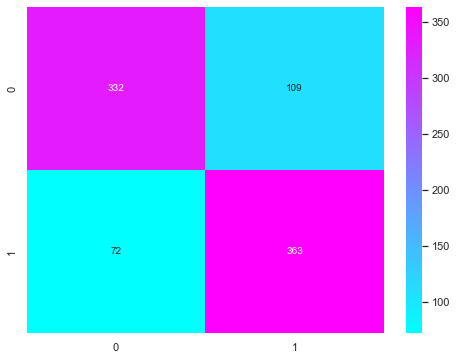

In [9]:
print_model_classification_report(xgb_model, X_test, y_test)

In [10]:
print_feature_importance(xgb_model)

CryoSleep            0.711821
HomePlanet_Earth     0.134443
HomePlanet_Europa    0.040034
HomePlanet_Mars      0.020320
Spa                  0.018429
VRDeck               0.017685
RoomService          0.016666
FoodCourt            0.015691
ShoppingMall         0.014165
Age                  0.010745
dtype: float32

## Model2: XXXXXXXXXX

Accuracy:	0.7990018929616245	|	Train-Accuracy:	0.7824100513992005
F1-Score:	0.7990867579908676	|	Train-F1-Score:	0.7824029543028298

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       441
         1.0       0.81      0.78      0.79       435

    accuracy                           0.80       876
   macro avg       0.80      0.80      0.80       876
weighted avg       0.80      0.80      0.80       876



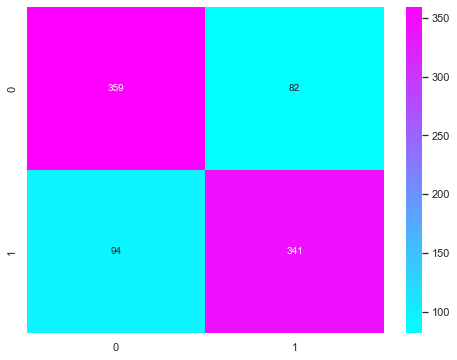

In [38]:
knn_model = KNeighborsClassifier(33) #33 -> 79,90
knn_model.fit(X_train, y_train)
print_model_classification_report(knn_model, X_test, y_test)

## RF

Accuracy:	0.8091216899460474	|	Train-Accuracy:	0.9099086236436322
F1-Score:	0.8093607305936074	|	Train-F1-Score:	0.9092131968845598

              precision    recall  f1-score   support

         0.0       0.84      0.77      0.80       441
         1.0       0.78      0.85      0.82       435

    accuracy                           0.81       876
   macro avg       0.81      0.81      0.81       876
weighted avg       0.81      0.81      0.81       876



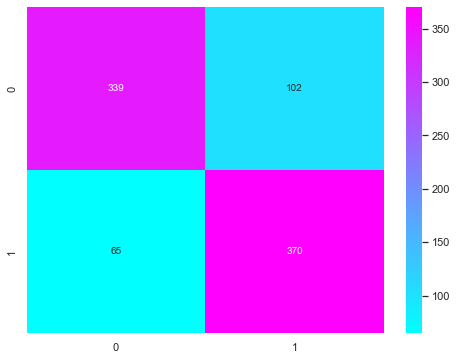

In [65]:
rf_model = RandomForestClassifier(n_estimators=180, random_state=101) # 180 -> 80.91
rf_model.fit(X_train, y_train)
print_model_classification_report(rf_model, X_test, y_test)

Accuracy:	0.7978501072338873	|	Train-Accuracy:	0.7875499714448886
F1-Score:	0.797945205479452	|	Train-F1-Score:	0.7871800702590804

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.79       441
         1.0       0.78      0.83      0.80       435

    accuracy                           0.80       876
   macro avg       0.80      0.80      0.80       876
weighted avg       0.80      0.80      0.80       876



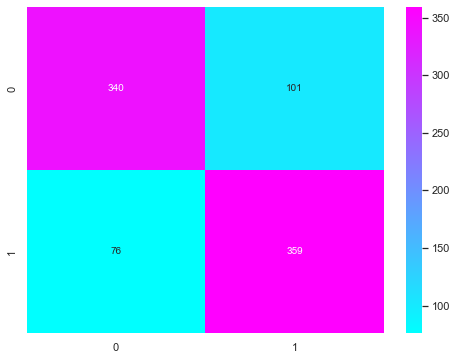

In [66]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
print_model_classification_report(svm_model, X_test, y_test)

Accuracy:	0.7419191919191919	|	Train-Accuracy:	0.9099086236436322
F1-Score:	0.7442922374429224	|	Train-F1-Score:	0.9092131968845598

              precision    recall  f1-score   support

         0.0       0.81      0.64      0.72       441
         1.0       0.70      0.85      0.77       435

    accuracy                           0.74       876
   macro avg       0.76      0.74      0.74       876
weighted avg       0.76      0.74      0.74       876



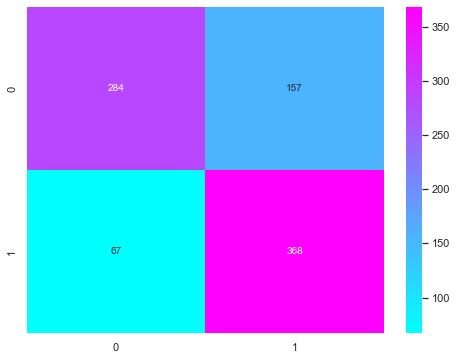

In [67]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
print_model_classification_report(dt_model, X_test, y_test)

# Final Model Selection

# Export the Model